This notebook was prepared by [Geoffrey Yip](www.github.com/geoffreyyip). 
Data Set is taken from [FiveThirtyEight's GitHub](github.com/fivethirtyeight/data/tree/master/bechdel). 
Original graphics from ["The Dollar-and-Cents Case Against Hollywood's Exclusion of Women"](www.fivethirtyeight.com/features/the-dollar-and-cents-case-against-hollywoods-exclusion-of-women/)

# 538-Data-Viz: Recreating FiveThirtyEight's Graphics on the Bechdel Test

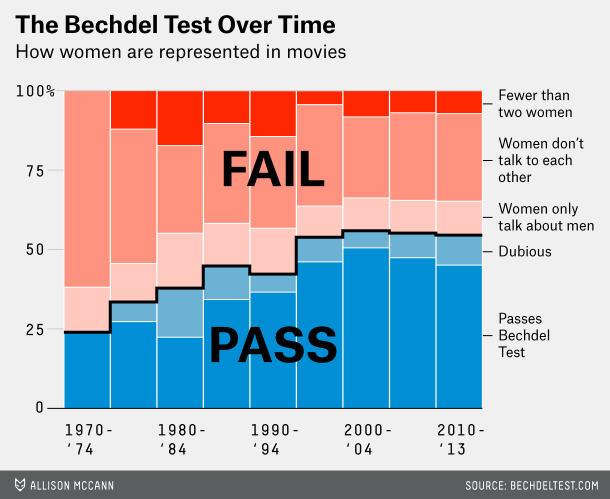

In [2]:
from IPython.display import Image

Image('alpha.png')

For those who are unfamiliar, the Bechdel test is a simple heuristic to gauge the level of female representation in a movie. A movie passes the Bechdel test if it satisfies three criteria. One, there are at least two named women. Two, they talk to each other. Three, they talk about something other than a man. 

It's a simple test and yet roughly half of all movies released today fail it.

## The Bechdel Test Over Time

First, let's import our tools. Pandas will be used to manipulate the data. Matplotlib will be used to visualize it.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Next we load the data set into a DataFrame. Data Set is taken from [FiveThirtyEight's GitHub](github.com/fivethirtyeight/data/tree/master/bechdel). 

In [4]:
movies_df = pd.read_csv('movies.csv')

movies_df.head()

,year,imdb,title,test,clean_test,binary,budget,domgross,intgross,code,budget_2013$,domgross_2013$,intgross_2013$,period code,decade code
0,2013,tt1711425,21 &amp; Over,notalk,notalk,FAIL,13000000,25682380,42195766,2013FAIL,13000000,25682380,42195766,1,1
1,2012,tt1343727,Dredd 3D,ok-disagree,ok,PASS,45000000,13414714,40868994,2012PASS,45658735,13611086,41467257,1,1
2,2013,tt2024544,12 Years a Slave,notalk-disagree,notalk,FAIL,20000000,53107035,158607035,2013FAIL,20000000,53107035,158607035,1,1
3,2013,tt1272878,2 Guns,notalk,notalk,FAIL,61000000,75612460,132493015,2013FAIL,61000000,75612460,132493015,1,1
4,2013,tt0453562,42,men,men,FAIL,40000000,95020213,95020213,2013FAIL,40000000,95020213,95020213,1,1


We got a lot of variables here. However, we will only need two for our first graphic: year, and clean_test. Year is used so we can chart over time. Clean_test is used to show how movies perform on the Bechdel Test. 

We can create a crosstab of year and clean_test ratings, and then plot a bar chart.

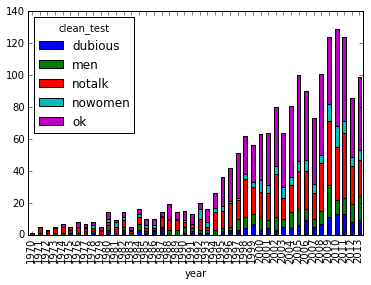

In [5]:
alpha_xt = pd.crosstab(movies_df['year'], movies_df['clean_test'])
alpha_xt.plot(kind='bar', stacked=True)

Hmmm... it needs some work. There's way too many columns. Let's group the years into 5-year periods.

In [46]:
# in the first loop, i = 0 and the function scans range(1970, 1975)
# in the 2nd loop, i = 1, and the function scans range(1975, 1980)
# and so forth
# it then returns a string of the time period it scanned
# in the first loop, it returns "1970-1974"
# in the 2nd loop, it returns "1975-1979"
# and so forth

def group(x):
    for i in range(0, (2015-1970) // 5): 
    # this determines how many 5-year periods to scan through
        if x in range(1970 + 5*i, 1975 + 5*i):
            return("{}-{}").format(1970 + 5*i, 1974 + 5*i)
            
        
movies_df['phase'] = movies_df['year'].apply(group)

print(movies_df[['year', 'phase']].sample(5))

      year      phase
1073  2002  2000-2004
1629  1988  1985-1989
397   2010  2010-2014
1019  2003  2000-2004
1211  2001  2000-2004


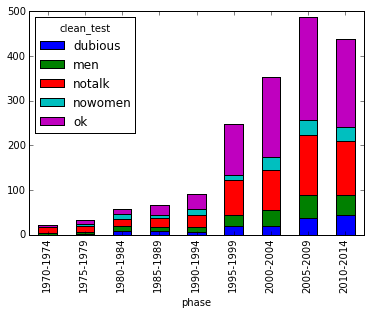

In [47]:
alpha_xt = pd.crosstab(movies_df['phase'], movies_df['clean_test'])
alpha_xt.plot(kind='bar', stacked=True)

Better, except it's hard to compare time periods. The 2010-2015 period has 438 movies, whereas the 1970-1975 period has only 21. Proportions would be helpful here. Let's normalize the data so that each time period adds up to 100%.

In [48]:
alpha_xt

clean_test,dubious,men,notalk,nowomen,ok
phase,,,,,
1970-1974,0,3,13,0,5
1975-1979,2,4,14,4,9
1980-1984,9,10,16,10,13
1985-1989,7,9,21,7,23
1990-1994,5,13,26,13,33
1995-1999,19,24,79,11,114
2000-2004,19,36,90,29,178
2005-2009,38,50,134,35,231
2010-2014,43,45,121,32,197


Here's the original crosstab.

In [49]:
alpha_xt_pct = alpha_xt.div(alpha_xt.sum(axis=1), axis=0)
alpha_xt_pct

clean_test,dubious,men,notalk,nowomen,ok
phase,,,,,
1970-1974,0.000000,0.142857,0.619048,0.000000,0.238095
1975-1979,0.060606,0.121212,0.424242,0.121212,0.272727
1980-1984,0.155172,0.172414,0.275862,0.172414,0.224138
1985-1989,0.104478,0.134328,0.313433,0.104478,0.343284
1990-1994,0.055556,0.144444,0.288889,0.144444,0.366667
1995-1999,0.076923,0.097166,0.319838,0.044534,0.461538
2000-2004,0.053977,0.102273,0.255682,0.082386,0.505682
2005-2009,0.077869,0.102459,0.274590,0.071721,0.473361
2010-2014,0.098174,0.102740,0.276256,0.073059,0.449772


And here is the normalized crosstab.

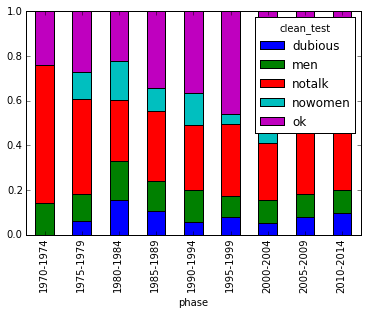

In [50]:
alpha_xt_pct.plot(kind='bar', stacked=True)

Almost there! We have two more things to do. First we need to reorder the bar stacks. The purple 'ok' column should be on the bottom. The blue 'dubious' column should be on top of that, then the 'men' column should be on top of that, then 'notalk', and finally 'nowomen' should be on top.

Second, we need to add a clear contrast between passing the Bechdel test and failing it. Right now, each category is too distinct. We want two colors, say red and blue, and varying shades of both.

Let's start by rearranging the columns.

In [51]:
alpha_xt_pct.columns

Index(['dubious', 'men', 'notalk', 'nowomen', 'ok'], dtype='object', name='clean_test')

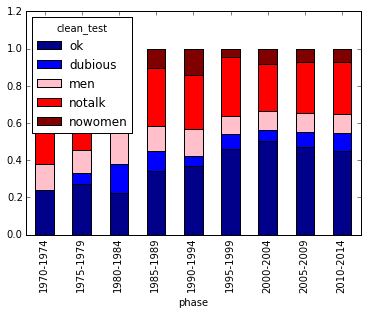

In [52]:
alpha_xt_pct = alpha_xt_pct[['ok', 'dubious', 'men', 'notalk', 'nowomen']]
alpha_xt_pct.plot(kind='bar', 
                  stacked=True, 
                  color= ('darkblue', 'blue','pink', 'red', 'maroon'))

Cool! Let's get that pesky legend out of the way, shrink the distance between the bars, and rebrand the y-axis values as percentages.

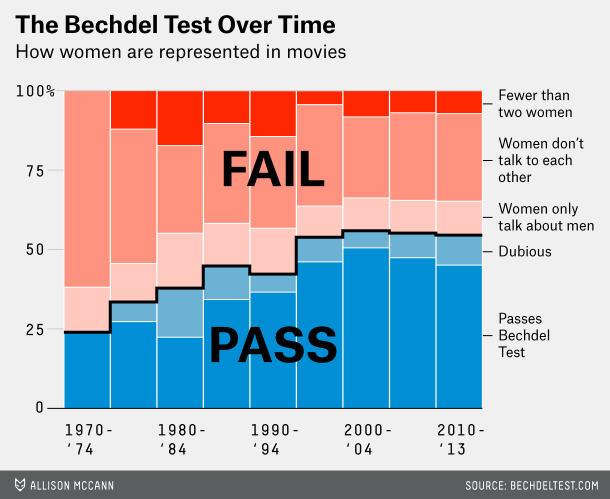

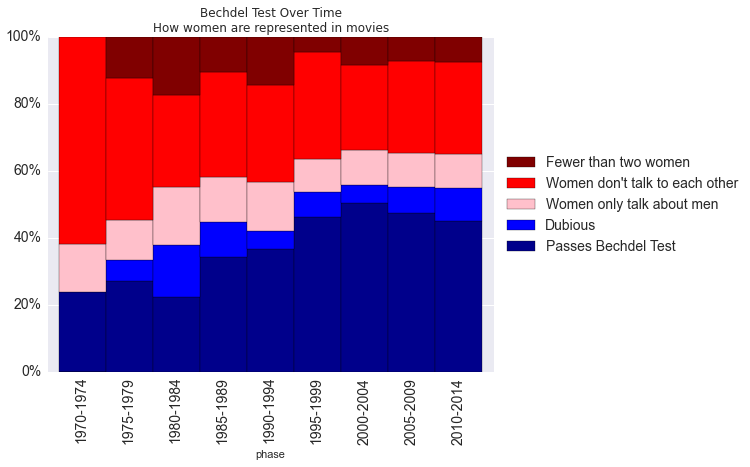

In [275]:
alpha_xt_pct = alpha_xt_pct[['ok', 'dubious', 'men', 'notalk', 'nowomen']]

ax = alpha_xt_pct.plot(kind='bar', 
                  stacked=True, 
                  color= ('darkblue', 'blue','pink', 'red', 'maroon'),
                  width=1,  # if width is 1, then it leaves no space between bars
                  ylim=[0,1],    # limits y-axis to values between 0 and 100%
                  title=('Bechdel Test Over Time \nHow women are represented in movies'),
                  figsize=(8,6),
                  fontsize=14,
                 )

handles, labels = ax.get_legend_handles_labels()
labels = ['Passes Bechdel Test', 
          'Dubious', 
          'Women only talk about men', 
          'Women don\'t talk to each other', 
          'Fewer than two women']

ax.legend(handles[::-1], labels[::-1], # reverses the legend order
          loc='center left', 
          bbox_to_anchor=(1, 0.5),
          fontsize=14,)    # moves the legend outside graph

vals = ax.get_yticks()
ax.set_yticklabels(['{}%'.format(int(x*100)) for x in vals])    # formats the tick labels with percentages


Image('alpha.png')

One down! Now let's move onto the next two.

#Median Budget for Films Since 1990

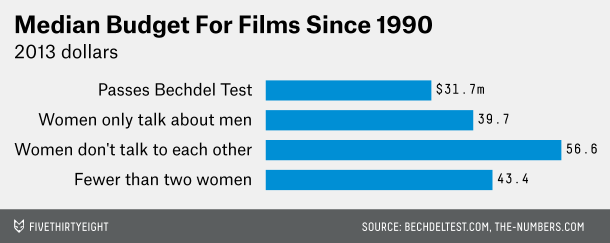

In [55]:
Image('beta.png')

Let's use a horizontal bar chart for this one. Two variables will be needed for this one: the budget adjusted for 2013 dollars, and the Bechdel test ratings. We will also need to filter for movies released in 1990 or later to match the original article.

In [56]:
# Filters movies to those released in 1990 or later
movies_df_X = movies_df[movies_df['year'] >= 1990]
# Returns median of each rating
movies_df_X = movies_df_X.groupby('clean_test').median()

movies_df_X

,year,budget,domgross,intgross,budget_2013$,domgross_2013$,intgross_2013$,period code,decade code
clean_test,,,,,,,,,
dubious,2007,30000000,41263140.0,79114085.0,35790994,49173429.0,89883201.0,2,2
men,2006,30000000,46923917.5,86819516.5,39737689,56392786.0,99578022.5,2,2
notalk,2006,45500000,54333290.0,100853753.0,56570083,63890455.0,123102194.0,2,2
nowomen,2006,39500000,39687694.0,81150788.0,43373066,44891296.5,89509349.0,2,2
ok,2005,25000000,37744889.0,66298908.0,31070724,45330446.5,80124349.0,2,2


We have 5 categories here. We need to reduce down to 4. 'dubious' should count as 'ok'. Let's define a new column.

In [60]:
def transform_clean_test(x):
    if x == 'dubious':
        return 'ok'
    else:
        return x
    
movies_df['clean_test_X'] = movies_df['clean_test'].apply(transform_clean_test)

movies_df['clean_test_X'].unique() # checks to make sure we have only 4 unique values left

array(['notalk', 'ok', 'men', 'nowomen', 'dubious'], dtype=object)

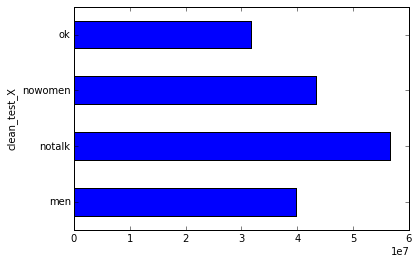

In [81]:
movies_df_X = movies_df[movies_df['year'] >= 1990]
movies_df_X = movies_df_X.groupby('clean_test_X').median()  # perform the same procedure but with new column

ax = movies_df_X['budget_2013$'].plot(kind='barh')

Simple. But the bars are in the wrong chart. And we need number labels.

In [82]:
movies_df_X

,year,budget,domgross,intgross,budget_2013$,domgross_2013$,intgross_2013$,period code,decade code
clean_test_X,,,,,,,,,
men,2006,30000000,46923917.5,86819516.5,39737689,56392786.0,99578022.5,2,2
notalk,2006,45500000,54333290.0,100853753.0,56570083,63890455.0,123102194.0,2,2
nowomen,2006,39500000,39687694.0,81150788.0,43373066,44891296.5,89509349.0,2,2
ok,2006,25500000,37771017.0,68336997.0,31652174,45709979.0,81832836.0,2,2


Let's rename the index.

In [97]:
movies_df_X.rename(index={'men':'Women only talk about men', 
                          'notalk':'Women don\'t talk to each other', 
                          'nowomen':'Fewer than two women', 
                          'ok':'Passes Bechdel Test'},
                   inplace=True)
movies_df_X['budget_2013$']

clean_test_X
Women only talk about men         39737689
Women don't talk to each other    56570083
Fewer than two women              43373066
Passes Bechdel Test               31652174
Name: budget_2013$, dtype: int64

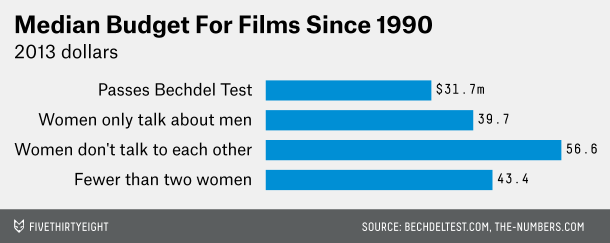

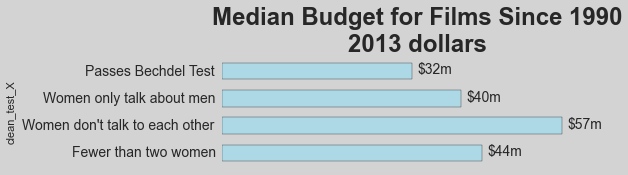

In [273]:
import seaborn as sb

plt.figure(figsize=(7,2))
foobar = movies_df_X['budget_2013$'].ix[['Fewer than two women',
                'Women don\'t talk to each other',
                'Women only talk about men',
                'Passes Bechdel Test']]

ax = foobar.plot(kind='barh', 
                 xlim=[0, 65 * 10**6],
                 fontsize=14,
                 color='lightblue',
                 grid=False,
                 width=0.60)

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().set_visible(False)


plt.gcf().patch.set_facecolor('lightgrey')
ax.patch.set_facecolor('lightgrey')
ax.set_title('Median Budget for Films Since 1990 \n2013 dollars',
             fontsize = 24, fontweight='bold')


rects = ax.patches

for i in range(0, len(rects)):
    rect =rects[i]
    height = rect.get_y() + 0.2
    width = rect.get_width() + 10**6
    value = "${}m".format(width//10**6)
    ax.text(width, height, value, fontsize=14)
    
Image('beta.png')

In [189]:
rects[3].get_height()

0.5